In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
import re

In [241]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [242]:
df.shape

(5572, 5)

In [243]:
# Step by Step How this Project is built

# 1. Data Cleaning
# 2. EDA (Exploratory Data Analysis)
# 3. Data Preprocessing
# 4. Model Building
# 5. Model Evaluation
# 6. Model Deployment


## 1. Data Cleaning

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Droping unwanted columns

In [263]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)
df.sample(5)

C:\Users\Vikas\AppData\Local\Temp\ipykernel_5576\3526107676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)


,Target,Text,num_Characters,num_words
925,0,"K, wait chikku..il send aftr &lt;#&gt; mins",44,7
3950,0,Hi dude hw r u da realy mising u today,38,10
3306,0,Set a place for me in your heart and not in yo...,148,29
2944,0,"Hey babe, sorry i didn't get sooner. Gary can ...",327,70
2174,0,See? I thought it all through,29,6


In [264]:
# Renaming the cols
df.rename(columns={'v1':"Target",'v2':"Text"},inplace=True)

C:\Users\Vikas\AppData\Local\Temp\ipykernel_5576\1556062372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'v1':"Target",'v2':"Text"},inplace=True)


In [265]:
encoder = LabelEncoder()

In [266]:
df["Target"]=encoder.fit_transform(df['Target'])

C:\Users\Vikas\AppData\Local\Temp\ipykernel_5576\549077939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Target"]=encoder.fit_transform(df['Target'])


In [267]:
df.head()

,Target,Text,num_Characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [268]:
# Missing Values
df.isnull().sum()

Target            0
Text              0
num_Characters    0
num_words         0
dtype: int64

In [269]:
# Check for duplicate values
df.duplicated().sum()

np.int64(0)

In [270]:
# Remove duplicate value
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [271]:
df.shape

(5169, 4)

# EDA 

In [272]:
df.head()

,Target,Text,num_Characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [273]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

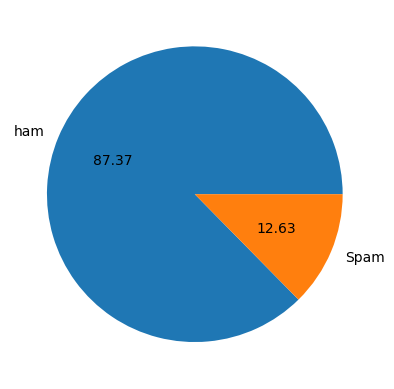

In [274]:
plt.pie(df['Target'].value_counts(),labels=["ham","Spam"],autopct='%0.2f')
plt.show()

In [275]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vikas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [276]:
df['num_Characters']=df["Text"].apply(len)

In [ ]:
df['num_words'] = df['Text'].fillna("").apply(lambda x: len(x.split()))
df['num_sentences'] = df['Text'].fillna("").apply(lambda x: len(re.split(r'[.!?]+', x)) - 1)

In [283]:
df.head()

,Target,Text,num_Characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13
